## class built-in methods

In [23]:
class Foo(object):
    def __init__(self, val):
        print('__init__')
        self.val = val
    
    def __call__(self, a, b, c):
        print('__call__')        
        print('a, b, c = {}'.format(str([a,b,c])))

# __init__
obj = Foo(10)

# __call__
obj(1,2,3)
        

__init__
__call__
a, b, c = [1, 2, 3]


## Decorator without Arguments

Reference: [Decorators I: Introduction to Python Decorators](http://www.artima.com/weblogs/viewpost.jsp?thread=240808)

In [28]:
import functools

def welcome(f):
    @functools.wraps(f) # this is to make docstring correct
    def decorated(*args, **kwargs):
        print('welcome!')
        
        return f(*args, **kwargs)

    return decorated

print('------ without decorator --------')
def foo(name):
    print(name)

foo('pppk')

print('------ with decorator --------')
@welcome
def foo(name):
    print(name)

foo('pppk')



------ without decorator --------
pppk
------ with decorator --------
welcome!
pppk


## Decorator with Arguments

Reference: [Python Decorators II: Decorator Arguments](http://www.artima.com/weblogs/viewpost.jsp?thread=240845)

In [32]:
def welcome(greeting):
    def decorator(f):
        @functools.wraps(f) # this is to make docstring correct
        def decorated(*args, **kwargs):
            print(greeting)
            return f(*args, **kwargs)

        return decorated
    return decorator

@welcome('您好')
@welcome('歡迎光臨')
def foo(name):
    print(name)

foo('pppk')

您好
歡迎光臨
pppk


## Meta Class

Reference: https://stackoverflow.com/questions/100003/what-is-a-metaclass-in-python

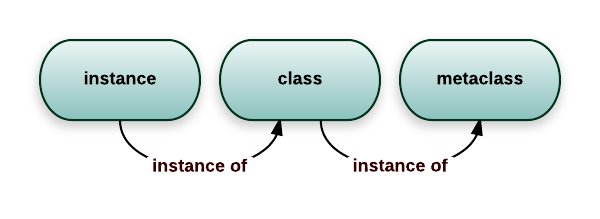

In [50]:
class Foo(object):
    pass

print(Foo)

# you use class Foo to create an instance
obj = Foo()
print('{}: type = {}'.format(obj, type(obj)))
print('obj class: {}'.format(obj.__class__))

print('')

# but actually class Foo is also an object (class object) so you can assign attributes to it
print(hasattr(Foo, 'new_attr'))
Foo.new_attr = 'new'
print(hasattr(Foo, 'new_attr'))

print('')

# class object Foo is created by its meta class, type
print('obj class.class: {}'.format(obj.__class__.__class__))

print('')

# you can also do it yourself, without class definition
Foo = type('Foo', (object,), {'new_attr': 'new'})
print(Foo)
print(hasattr(Foo, 'new_attr'))


<class '__main__.Foo'>
<__main__.Foo object at 0x7fd9bc1c68d0>: type = <class '__main__.Foo'>
obj class: <class '__main__.Foo'>

False
True

obj class.class: <class 'type'>

<class '__main__.Foo'>
True


### customized meta class

```
__metaclass__ can actually be any callable, it doesn't need to be a formal class
```

In [82]:
# remember that `type` is actually a class like `str` and `int`
# so you can inherit from it
class UpperAttrMetaclass(type):
    # __new__ is the method called before __init__
    # it's the method that creates the object and returns it
    # while __init__ just initializes the object passed as parameter
    # you rarely use __new__, except when you want to control how the object
    # is created.
    # here the created object is the class, and we want to customize it
    # so we override __new__
    # you can do some stuff in __init__ too if you wish
    # some advanced use involves overriding __call__ as well, but we won't
    def __new__(cls, clsname, bases, dct):
        print('UpperAttrMetaClass: __new__')
        uppercase_attr = {}
        for name, val in dct.items():
            if not name.startswith('__'):
                uppercase_attr[name.upper()] = val
            else:
                uppercase_attr[name] = val

        return super(UpperAttrMetaclass, cls).__new__(cls, clsname, bases, uppercase_attr)        
    
class Foo(metaclass=UpperAttrMetaclass):
    # the following line is for python 2, python 3 use metaclass=xxx in declaration
    #__metaclass__ = UpperAttrMetaclass
    
    name = 'foo'
    address = 'home'

foo = Foo()
print(foo.__class__.__class__)
print(dir(foo))

UpperAttrMetaClass: __new__
<class '__main__.UpperAttrMetaclass'>
['ADDRESS', 'NAME', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


### singleton metaclass

In [86]:
class MetaSingleton(type):
    instance = None
    
    def __call__(cls, *args, **kw):
        if cls.instance is None:
            cls.instance = super(MetaSingleton, cls).__call__(*args, **kw)
            
        return cls.instance

class Foo(metaclass=MetaSingleton):
    pass

a = Foo()
b = Foo()
    
print(a is b)

True
